In [2]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('train.csv')
data.shape
train = data.iloc[0:800,:]

train.to_json('housedata.json')
#remove Nan columns
train = train.dropna(axis=1)
train.shape

train.head()




,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [4]:
# investigate Sale Price
train['SalePrice']

0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
795    171000
796    143500
797    110000
798    485000
799    175000
Name: SalePrice, Length: 800, dtype: int64

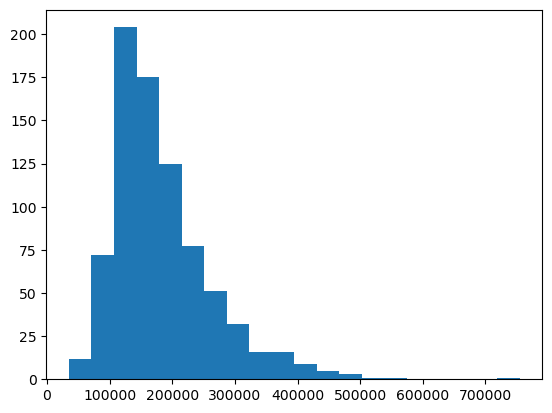

In [5]:
#make a histogram of SalePrice
plt.hist(train['SalePrice'], bins=20)
plt.show()

In [23]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
numeric.shape

(800, 78)

In [24]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:8].index
# cast to list
cols = cols.tolist()
print(cols)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd']


In [25]:
# pick out X cols and Y = SalePricee
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd
0,7,1710,2,548,856,856,8
1,6,1262,2,460,1262,1262,6
2,7,1786,2,608,920,920,6
3,7,1717,3,642,756,961,7
4,8,2198,3,836,1145,1145,9
...,...,...,...,...,...,...,...
795,6,1564,2,476,650,888,7
796,6,1285,2,528,660,1285,7
797,5,773,1,240,773,773,4
798,9,3140,3,820,1926,1966,11


In [26]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)
print(lr.coef_)
model.score(X, Y)

[ 2.17140041e+04  5.10189259e+01  6.73866033e+03  4.21981600e+01
  3.32392704e+01  1.10069118e+01 -4.36347819e+02]


0.7942395937993604

In [27]:
#get score for model using the next 200 rows
test = data.iloc[800:1000,:]
test.shape
X_test = test[cols]
X_test = X_test.drop(['SalePrice'], axis = 1)
Y_test = test['SalePrice']
predictions = model.predict(X_test)
model.score(X_test, Y_test)






0.7753727689623309

In [28]:
#predict on the last 460 rows and write into a csv file with only Id and SalePrice
test = data.iloc[1000:,:]
test.shape
X_test = test[cols]
X_test = X_test.drop(['SalePrice'], axis = 1)
predictions = model.predict(X_test)
predictions = np.array(predictions).reshape(-1,1)
test['SalePrice'] = predictions
test = test[['Id', 'SalePrice']]
test.to_csv('Predictions.csv', index=False)




/tmp/ipykernel_11571/3426689264.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['SalePrice'] = predictions
